In [1]:

# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df=pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
#Preparing X and y variable 
X=df.drop('math_score',axis=1)

In [13]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [16]:
print("Categories in 'gender' variable :", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable :", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'Parental_level_of_education' variable :", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'test_preparation_course' variable :", end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable : ['female' 'male']
Categories in 'race_ethnicity' variable : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'Parental_level_of_education' variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'test_preparation_course' variable : ['none' 'completed']


In [17]:
y=df['math_score']

In [22]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [23]:
X=preprocessor.fit_transform(X)

In [24]:
X.shape

(1000, 19)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
#Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [28]:
models={
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Forest Regressor": RandomForestRegressor(),
    "XGB regressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train) ##train the model
    
    #make predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    #Evaluate Train and test dataset
    model_train_mae, model_train_rmse, model_train_r2=evaluate_model(y_train,y_train_pred)
    
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for Training set")
    print("Root mean squared error: {:.4f}".format(model_train_rmse))
    print("mean absolute error: {:.4f}".format(model_train_mae))
    print("R2 score: {:.4f}".format(model_train_r2))


    print('-----------------------------------------')
    
    print("Model performance for Testing set")
    print("Root mean squared error: {:.4f}".format(model_test_rmse))
    print("mean absolute error: {:.4f}".format(model_test_mae))
    print("R2 score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')






Linear Regression
Model performance for Training set
Root mean squared error: 5.3274
mean absolute error: 4.2788
R2 score: 0.8741
-----------------------------------------
Model performance for Testing set
Root mean squared error: 5.4096
mean absolute error: 4.2259
R2 score: 0.8797


Lasso
Model performance for Training set
Root mean squared error: 6.5938
mean absolute error: 5.2063
R2 score: 0.8071
-----------------------------------------
Model performance for Testing set
Root mean squared error: 6.5197
mean absolute error: 5.1579
R2 score: 0.8253


K-Neighbors Regressor
Model performance for Training set
Root mean squared error: 5.7122
mean absolute error: 4.5187
R2 score: 0.8553
-----------------------------------------
Model performance for Testing set
Root mean squared error: 7.2516
mean absolute error: 5.6160
R2 score: 0.7839


Decision Forest Regressor
Model performance for Training set
Root mean squared error: 2.3153
mean absolute error: 1.8459
R2 score: 0.9762
---------------

In [29]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.879740
6,AdaBoost Regressor,0.853747
3,Decision Forest Regressor,0.852226
5,CatBoosting Regressor,0.851632
4,XGB regressor,0.827797
1,Lasso,0.825320
2,K-Neighbors Regressor,0.783898


In [31]:
### Linear Regression
lin_model=LinearRegression(fit_intercept=True)
lin_model= lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.97


Text(0, 0.5, 'predicted')

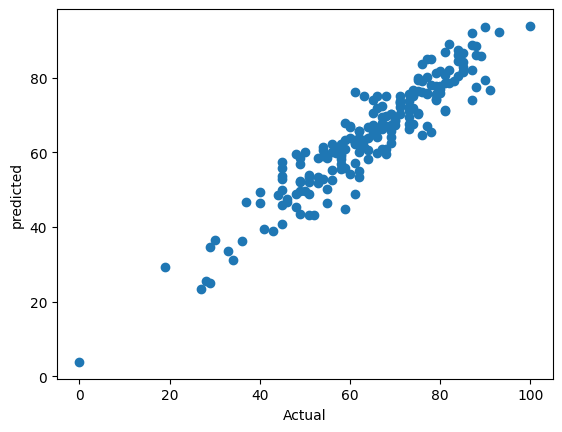

In [32]:
##Plot y_pred and y_test
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')


<Axes: xlabel='math_score'>

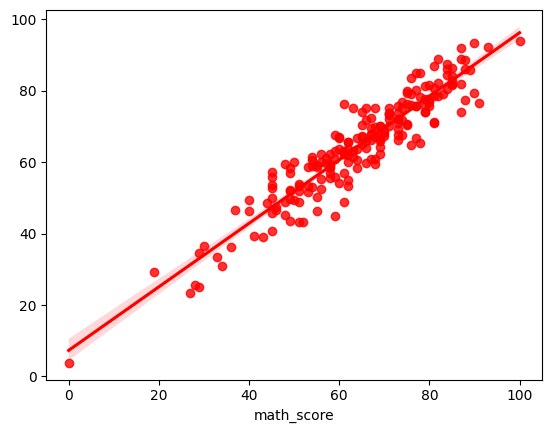

In [33]:
sns.regplot(x=y_test,y=y_pred, color='red')

In [34]:
## Difference between actual and predicted values


pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.703125,14.296875
737,53,58.578125,-5.578125
740,80,76.828125,3.171875
660,74,76.734375,-2.734375
411,84,87.484375,-3.484375
...,...,...,...
408,52,43.125000,8.875000
332,62,62.109375,-0.109375
208,74,67.562500,6.437500
613,65,67.328125,-2.328125
